# 各種の描画関数

このセクションでは、matplotlibを使用していくつかの一般的なグラフを描画する方法を紹介します。matplotlibの各描画関数には、グラフのさまざまな属性を設定するための多くのキーワード引数がありますが、本書ではそれらをすべて紹介することはできません。一般的に、読者がグラフに特定の設定を行う必要がある場合、描画関数の説明文書やmatplotlibのデモページで関連する説明を見つけることができます。

In [1]:
import numpy as np
import helper.matplotlib
from matplotlib import pyplot as plt

## 対数座標グラフ

前に`plot()`を使用して曲線グラフを描画する方法を紹介しましたが、そのグラフのX-Y軸座標は算術座標でした。次に、対数座標系でグラフを描画する方法を見てみましょう。

対数座標グラフを描画する関数は3つあります：`semilogx()`、`semilogy()`、`loglog()`で、それぞれX軸が対数座標、Y軸が対数座標、および両軸が対数座標のグラフを描画します。

以下のプログラムは、4つの異なる座標系を使用してローパスフィルタの周波数応答曲線を描画します。その結果は次のグラフに示されています。左上のグラフは`plot()`で描画された算術座標系、右上のグラフは`semilogx()`で描画されたX軸対数座標系、左下のグラフは`semilogy()`で描画されたY軸対数座標系、右下のグラフは`loglog()`で描画された両対数座標系です。両対数座標系で表される周波数応答曲線は通常ボード線図と呼ばれます。

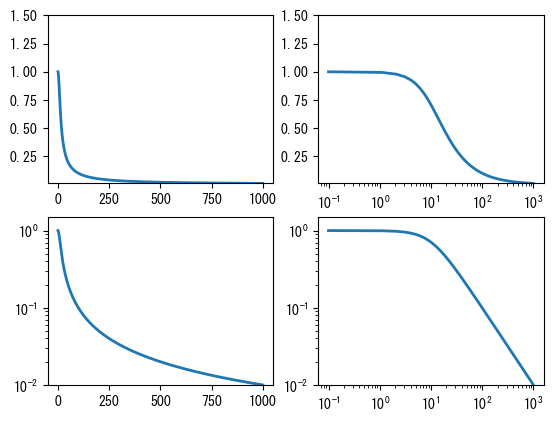

In [6]:
w = np.linspace(0.1, 1000, 1000)
p = np.abs(1 / (1 + 0.1j * w))  # ローパスフィルタの周波数応答を計算

fig, axes = plt.subplots(2, 2)

functions = ("plot", "semilogx", "semilogy", "loglog")

for ax, fname in zip(axes.ravel(), functions):
    func = getattr(ax, fname)
    func(w, p, linewidth=2)
    ax.set_ylim(0.01, 1.5)

## 極座標グラフ

極座標系はデカルト座標系とは全く異なる座標系で、極座標系の点は中心点からの角度と距離で表されます。以下のプログラムは極座標グラフを描画し、その効果は次のグラフに示されています。

(<a list of 4 Line2D ticklines objects>,
 [Text(0.0, 0, '0°'), Text(0.7853981633974483, 0, '45°')])

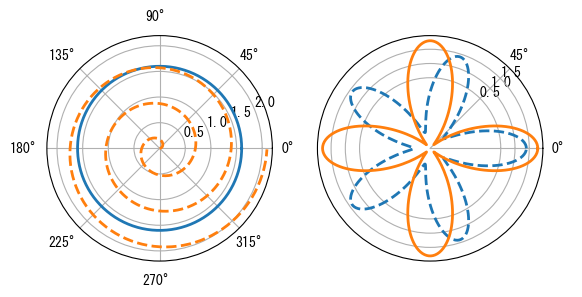

In [7]:
theta = np.arange(0, 2 * np.pi, 0.02)

plt.subplot(121, polar=True)  #❶
plt.plot(theta, 1.6 * np.ones_like(theta), linewidth=2)  #❷
plt.plot(3 * theta, theta / 3, "--", linewidth=2)

plt.subplot(122, polar=True)
plt.plot(theta, 1.4 * np.cos(5 * theta), "--", linewidth=2)
plt.plot(theta, 1.8 * np.cos(4 * theta), linewidth=2)
plt.rgrids(np.arange(0.5, 2, 0.5), angle=45)  #❸
plt.thetagrids([0, 45])  #❹;

❶`subplot()`を呼び出してサブプロットを作成する際に、`polar`パラメータを`True`に設定することで、極座標サブプロットを作成します。❷次に、`plot()`を呼び出して極座標サブプロットにグラフを描画します。また、`polar()`を使用して直接極座標サブプロットを作成し、その中に曲線を描画することもできます。

❸`rgrids()`は同心円グリッドの半径とテキストラベルの角度を設定します。したがって、右図の点線の円は3つあり、半径はそれぞれ0.5、1.0、1.5で、これらのテキストは45度線に沿って配置されています。❹`thetagrids()`は放射状グリッド線の角度を設定します。したがって、右図には2本の放射状グリッド線があり、その角度はそれぞれ0度と45度です。

## 棒グラフ

棒グラフは各棒の長さで値の大きさを表し、通常は2つ以上のグループの値を比較するために使用されます。以下のプログラムは、ファイルから中国の人口の年齢分布データを読み取り（人口分布データはWikipediaから提供されており、参考用であり、正確性は保証されません）、棒グラフを使用して男性と女性の年齢分布を比較します。その効果は次のグラフに示されています。

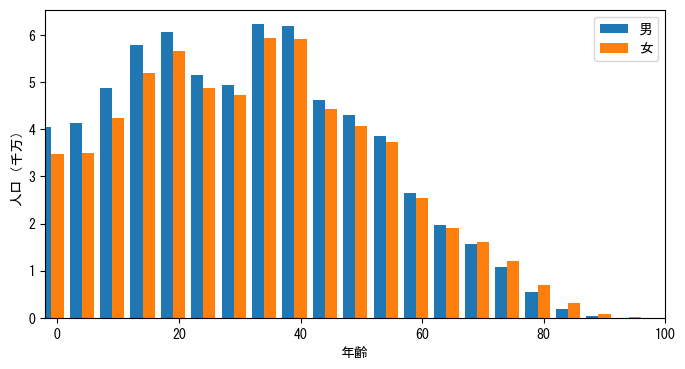

In [11]:
data = np.loadtxt("data/china_population.txt")
width = (data[1, 0] - data[0, 0]) * 0.4  #❶
plt.figure(figsize=(8, 4))
plt.bar(data[:, 0] - width, data[:, 1] / 1e7, width, label="男")  #❷
plt.bar(data[:, 0], data[:, 2] / 1e7, width, label="女")  #❸
plt.xlim(-width, 100)
plt.xlabel("年齢")
plt.ylabel("人口（千万）")
plt.legend();

読み込まれたデータの最初の列は年齢で、棒グラフの横軸として使用されます。❶まず、棒グラフの各棒の幅を計算します。各年齢層に2本の棒を描画するため、棒の幅は年齢層の半分未満でなければなりません。ここでは、年齢層の0.4倍を棒の幅とします。

❷`bar()`を呼び出して男性の人口分布の棒グラフを描画します。最初のパラメータは各棒の左端の横座標で、男性と女性の棒が年齢目盛りを中心に配置されるように、各棒の左端の横座標を「年齢から棒の幅を引いた値」とします。`bar()`の2番目のパラメータは各棒の高さで、3番目のパラメータはすべての棒の幅を指定します。3番目のパラメータがシーケンスの場合、各棒の幅を指定できます。

❸女性の人口分布の棒グラフを描画します。ここでは、年齢を棒の左端の横座標とし、女性と男性の人口分布図が年齢目盛りを中心に配置されます。

## 散布図

`plot()`を使用してグラフを描画する際、スタイルパラメータをデータポイントのみ描画するように指定すると、散布図が描画されます。例えば：

```python
plt.plot(np.random.random(100), np.random.random(100), "o")
```

ただし、この方法で描画された点は個別に色やサイズを指定できません。`scatter()`で描画される散布図は、各点の色とサイズを指定できます。以下のプログラムは`scatter()`の使い方を示し、その効果は次のグラフに示されています。

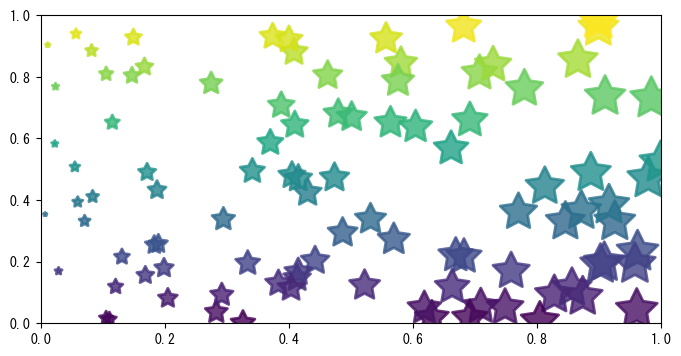

In [12]:
plt.figure(figsize=(8, 4))
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y, s=x * 1000, c=y, marker=(5, 1), alpha=0.8, lw=2, facecolors="none")
plt.xlim(0, 1)
plt.ylim(0, 1);

`scatter()`の最初の2つのパラメータは2つの配列で、それぞれ各点のX軸とY軸の座標を指定します。`s`パラメータは点のサイズを指定し、その値は点の面積に比例します。単一の値または配列を指定できます。

`c`パラメータは各点の色を指定し、値または配列を指定できます。ここでは、1次元配列を使用して各点に値を指定します。カラーマップを使用して、各値に対応する色が決定されます。デフォルトのカラーマップでは、青が最小値に対応し、赤が最大値に対応します。`c`パラメータが形状`(N, 3)`または`(N, 4)`の2次元配列の場合、各点のRGB色を直接指定します。

`marker`パラメータは点の形状を設定します。形状を表す文字列または多角形を表す2要素のタプルを指定できます。最初の要素は多角形の辺の数を表し、2番目の要素は多角形のスタイルを表し、0、1、2、3の値を取ります。0は多角形、1は星形、2は放射状、3は辺数を無視して円形を表示します。

最後に、`alpha`パラメータで点の透明度を設定し、`lw`パラメータで線幅を設定します。`lw`は`linewidth`の略です。`facecolors`パラメータを`"none"`に設定すると、散布図の点に塗りつぶし色がなくなります。

## 画像

`imread()`と`imshow()`は、簡単な画像の読み込みと表示機能を提供します。`imread()`は画像ファイルからデータを読み取り、画像を表すNumPy配列を取得します。最初のパラメータはファイル名またはファイルオブジェクトで、`format`パラメータは画像タイプを指定します。省略した場合、ファイルの拡張子から画像タイプが決定されます。グレースケール画像の場合、形状`(M, N)`の配列を返し、カラー画像の場合、形状`(M, N, C)`の配列を返します。`M`は画像の高さ、`N`は画像の幅、`C`は3または4で、画像のチャンネル数を表します。以下のプログラムは`vinci_target.png`から画像データを読み取り、得られた配列`img`は形状`(505, 375, 3)`の4バイト浮動小数点型配列です。通常使用される画像が各ピクセルの赤、緑、青の各チャンネルの成分を1バイトで保存しているため、`img = (img * 255).astype(np.uint8)`でこの配列を1バイトのデータ型に変換します。

:::{note}
Matplotlib の `imread` 関数は、画像ファイルのフォーマットによって異なるデータ型 (`dtype`) の配列を返します。特に、PNG 形式と JPEG 形式で `dtype` が異なることに注意が必要です。PNG ファイルを読み込むと、返される配列の `dtype` は `float32` になります。これは、Matplotlib の内部処理として PNG 画像のピクセル値を 0.0 から 1.0 の範囲に正規化するためです。一方、JPEG 形式の画像を `imread` で読み込むと、返される配列の `dtype` は `uint8` になります。JPEG は圧縮形式であり、通常 8 ビットの整数値 (0～255) でピクセルを表現するため、正規化は行われません。
:::

In [15]:
img = plt.imread("data/vinci_target.png")
img = (img * 255).astype(np.uint8)
print(img.shape, img.dtype)

(505, 375, 3) uint8


次に、`imshow()`を使用して`img`が表す画像を表示します：

❶`imshow()`は`imread()`が返す配列を表示するために使用できます。配列が多チャンネル画像を表す3次元配列の場合、各ピクセルの色は各チャンネルの値によって決定されます。

❷`imshow()`が描画するグラフのY軸の正方向は上から下です。`imshow()`の`origin`パラメータを`"lower"`に設定すると、表示されるグラフの原点は左下になりますが、画像全体が上下逆になります。

❸3次元配列の要素タイプが浮動小数点数の場合、要素値の範囲は0.0から1.0で、色値0から255に対応します。この範囲を超えると、色が異常なピクセルが表示される可能性があります。以下の例では、配列`img`を浮動小数点配列に変換し、`imshow()`で表示します。値の範囲が0.0〜1.0を超えているため、色が異常に表示されます。

❹0.0〜1.0の範囲の浮動小数点配列は、元の画像と完全に同じです。❺`clip()`を使用して範囲外の値を範囲内に制限すると、画像全体が明るくなります。

❻`imshow()`のパラメータが2次元配列の場合、カラーマップを使用して各ピクセルの色が決定されます。ここでは、画像の赤チャンネルを表示します。これは2次元配列です。デフォルトのカラーマップでは、最小値が青、最大値が赤にマッピングされるため、表示効果は恐ろしいものになります。`colorbar()`を使用して、カラーマップをグラフに表示できます。❼`imshow()`の`cmap`パラメータを使用して、画像を表示する際に使用するカラーマップを変更できます。`copper`という名前のカラーマップを使用して、画像の赤チャンネルを表示します。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


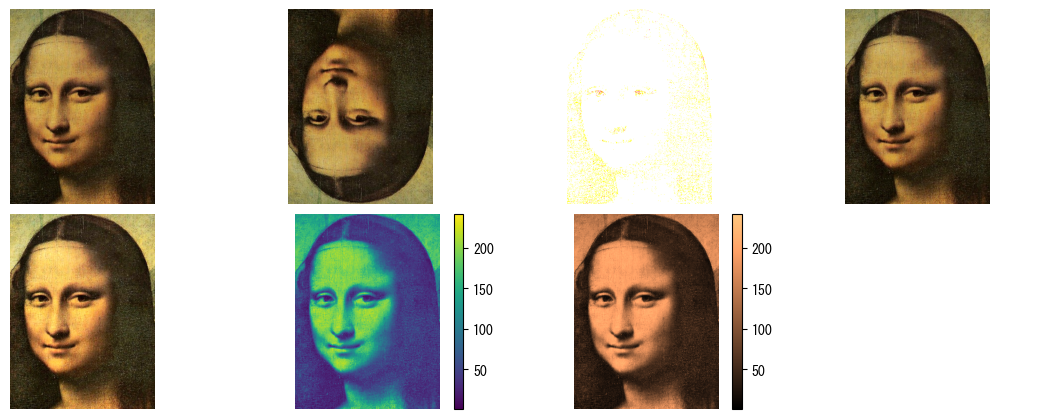

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(11, 4))
fig.subplots_adjust(0, 0, 1, 1, 0.05, 0.05)

axes = axes.ravel()

axes[0].imshow(img)  #❶
axes[1].imshow(img, origin="lower")  #❷
axes[2].imshow(img * 1.0)  #❸
axes[3].imshow(img / 255.0)  #❹
axes[4].imshow(np.clip(img / 200.0, 0, 1))  #❺

axe_img = axes[5].imshow(img[:, :, 0])  #❻
plt.colorbar(axe_img, ax=axes[5])

axe_img = axes[6].imshow(img[:, :, 0], cmap="copper")  #❼
plt.colorbar(axe_img, ax=axes[6])

for ax in axes:
    ax.set_axis_off()

カラーマップは`ColorMap`オブジェクトで、matplotlibには多くのカラーマップが事前に定義されています。以下の文を使用して、これらのカラーマップの名前を見つけることができます：

In [20]:
plt.colormaps()[:5]

['magma', 'inferno', 'plasma', 'viridis', 'cividis']

`imshow()`を使用して任意の2次元データを表示できます。例えば、以下のプログラムは画像を使用して、2変数関数$f(x,y) = x e^{x^2-y^2}$を視覚的に表示します。その効果は次のグラフに示されています。

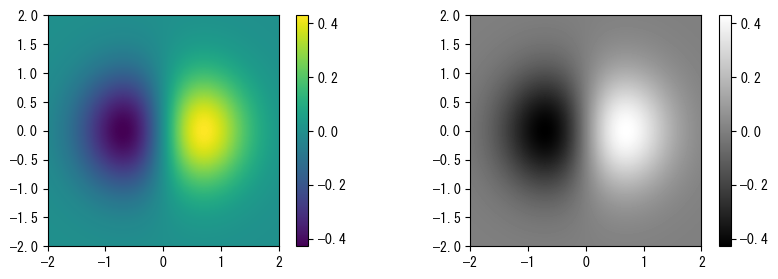

In [21]:
y, x = np.ogrid[-2:2:200j, -2:2:200j]
z = x * np.exp(-(x**2) - y**2)  #❶

extent = [np.min(x), np.max(x), np.min(y), np.max(y)]  #❷

plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.imshow(z, extent=extent, origin="lower")  #❷
plt.colorbar()
plt.subplot(122)
plt.imshow(z, extent=extent, cmap=cm.gray, origin="lower")
plt.colorbar();

❶まず、配列のブロードキャスト機能を使用して、関数値を表す2次元配列`z`を計算します。注意点として、その第0軸はY軸、第1軸はX軸を表します。❷次に、X軸とY軸の値の範囲を`extent`リストに保存します。❸`extent`リストを`imshow()`の`extent`パラメータに渡すと、グラフのX軸とY軸の目盛りラベルが`extent`リストで指定された範囲を使用します。

## 等高線図

2変数関数を等高線図で表すこともできます。等高線とは、関数値が等しい点を結んだ滑らかな曲線です。等高線は、2変数関数値の変化傾向を視覚的に表すことができます。例えば、等高線が密集している場所は、関数値がその場所で大きく変化していることを示します。matplotlibでは、`contour()`と`contourf()`を使用して等高線を描画できます。これらの違いは、`contourf()`が塗りつぶし効果のある等高線を生成することです。以下のプログラムは、これらの関数の使い方を示し、その効果は次のグラフに示されています：

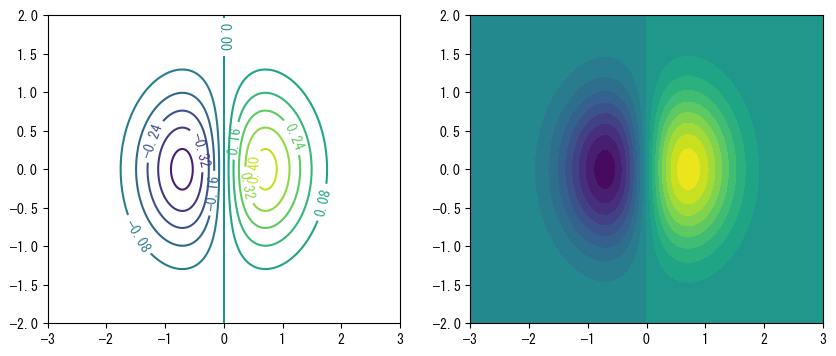

In [22]:
y, x = np.ogrid[-2:2:200j, -3:3:300j]  #❶
z = x * np.exp(-(x**2) - y**2)

extent = [np.min(x), np.max(x), np.min(y), np.max(y)]

plt.figure(figsize=(10, 4))
plt.subplot(121)
cs = plt.contour(z, 10, extent=extent)  #❷
plt.clabel(cs)  #❸
plt.subplot(122)
plt.contourf(x.reshape(-1), y.reshape(-1), z, 20)  #❹;

❶X軸とY軸をより明確に区別するため、ここではそれらの取りうる値の範囲と分割数を異なるものにしています。これにより得られる配列`z`の形状は`(200, 300)`で、その第0軸はY軸に、第1軸はX軸に対応します。

❷`contour()`を呼び出して配列`z`の等高線図を描画します。第2引数が10であるため、関数の取りうる値の範囲を10個の区間に等分割し、表示される等高線図には9本の等高線が含まれます。`imshow()`と同様に、`extent`パラメータを使用して等高線図のX軸とY軸のデータ範囲を指定できます。❸`contour()`が返すのは`QuadContourSet`オブジェクトで、これを`clabel()`に渡すと、等高線に対応する値がラベル付けされます。

❹`contourf()`を呼び出して塗りつぶし効果のある等高線図を描画します。ここでは、X軸とY軸の取りうる値の範囲を設定する別の方法を示しています。最初の2つの引数は、配列zを計算する際に使用されたX軸とY軸上のサンプル点で、これらは1次元配列または配列`z`と同じ形状の配列でなければなりません。

:::{tip}
散在点データに対して等高線図を描画する必要がある場合、`scipy.interpolate`モジュールで提供される補間関数を使用して、散在点データをグリッドデータに補間することができます。
:::

等高線を使用して陰関数曲線を描画することもできます。陰関数とは、方程式$f(x,y)=0$において、$x$がある区間内で任意の値を取るとき、常にそれに対応する$y$がこの方程式を満たす場合、方程式$f(x,y)=0$はその区間上で$x$の陰関数$y$を定めると言います。例えば、陰関数$x^2+y^2-1=0$は単位円を表します。

明らかに、一般的な関数を描画するように、変数$x$の取りうる値を表す等差配列を作成し、配列内の各$x$に対応する$y$値を計算することはできません。この問題を解決するために等高線を使用できます。明らかに、陰関数の曲線は値が0の等高線です。以下のプログラムは、関数：

$$f(x,y)=(x^2+y^2)^4 - (x^2-y^2)^2$$

を$f(x,y)=0$と$f(x,y)-0.1=0$のときに描画します。その効果は次のグラフ（左）に示されています。

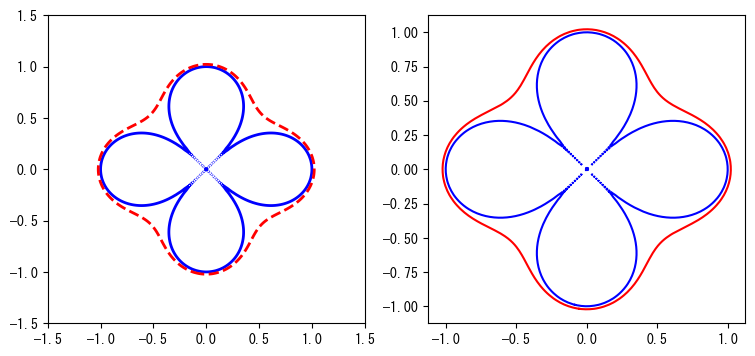

In [62]:
y, x = np.ogrid[-1.5:1.5:200j, -1.5:1.5:200j]
f = (x**2 + y**2) ** 4 - (x**2 - y**2) ** 2

plt.figure(figsize=(9, 4))
plt.subplot(121)
extent = [np.min(x), np.max(x), np.min(y), np.max(y)]
cs = plt.contour(
    f,
    extent=extent,
    levels=[0.0, 0.1],  #❶
    colors=["b", "r"],
    linestyles=["solid", "dashed"],
    linewidths=[2, 2],
)

plt.subplot(122)
for i, p in enumerate(cs.get_paths()):  #❷
    color = cs.get_edgecolors()[i]
    for poly in p.to_polygons():
        plt.plot(poly[:, 0], poly[:, 1], color=color)

❶`contour()`を呼び出して等高線を描画する際、`levels`パラメータを使用して等高線に対応する関数値を指定できます。ここでは`levels`パラメータを`[0, 0.1]`に設定しているため、最終的に2本の等高線が描画されます。`colors`、`linestyles`、`linewidths`などのパラメータを使用して、各等高線の色、線種、線幅をそれぞれ指定できます。

上のグラフ（左）を注意深く観察すると、陰関数$f(x,y)=0$を表す青色の実線が完全に連続していないことがわかります。図の中央部分では、多くの孤立した小さなセグメントで構成されています。これは、等高線が原点付近で無限に近づくため、関数$f$の取りうる値の空間をどのように細分化しても、常に分離できない部分が存在し、最終的に図中の孤立した小さな領域が生じるためです。一方、陰関数$f(x,y)-0.1=0$を表す赤色の破線は閉じていて連続しています。

❷等高線集合`cs`から等高線を表すパスを見つけ、`plot()`を使用して描画します。その効果は上のグラフ（右）に示されています。

`contour()`は`QuadContourSet`オブジェクトを返し、その各種の属性で高線の情報を取得することができます。

In [47]:
print(cs)

各等高線には、独自の色、線種、線幅などの属性があります。次のコードは色と線幅を取得します。

In [46]:
print(cs.get_edgecolors())
print(cs.get_linewidths())

[[0. 0. 1. 1.]
 [1. 0. 0. 1.]]
[2 2]


`get_paths()`メソッドは、等高線を構成するすべてのパスを取得します。一つのパスには複数の部分から構成することがあります。`to_polygons()`でパスをポリゴンのリストに変換できます。この例では、青色の実線で表される等高線は42個のパスで構成されています：

In [63]:
print(len(cs.get_paths()))
path0 = cs.get_paths()[0]
len(path0.to_polygons())

2


42

パスは`Path`オブジェクトで、その`vertices`属性を使用してパス上のすべての点の座標を取得できます：

In [64]:
path1 = cs.get_paths()[1]
path1.vertices

array([[-0.05276382, -1.01841473],
       [-0.05830807, -1.01758794],
       [-0.0678392 , -1.01594938],
       ...,
       [-0.02261307, -1.02126475],
       [-0.03768844, -1.02011677],
       [-0.05276382, -1.01841473]])

## 四角形メッシュ

`pcolormesh(X, Y, C)`は、`X`、`Y`、`C`の3つの配列で定義される四角形メッシュを描画します。これらの配列は2次元配列で、`X`と`Y`の形状は同じで、`C`の形状は`X`と`Y`と同じか、それらより1行1列少ない場合があります。各四角形の4つの頂点のX軸座標は、`X`内の上下左右に隣接する4つの要素で決定され、Y軸座標は`Y`内の対応する4つの要素で決定されます。四角形の色は、`C`内の対応する要素とカラーマップで決定されます。

`shading`引数には以下の3種類の描画方法があります。

* `'flat'`: `C`のサイズが`X`のサイズより1行1列少ない場合、この描画モードが自動的に選択されます。
* `'nearest'`: `X`と`Y`のサイズを1行1列大きくし、`flat`モードで描画します。
* `'gouraud'`: `X`、`Y`、`C`のサイズがすべて同じで、四角形内部の色は四つの頂点の色の合成によって決まります。

以下の例では、`X`と`Y`の形状はどちらも`(2, 3)`で、上下左右に隣接する4つの要素の2つのグループがあり、2つの四角形の4つの頂点が定義されています：

```
 最初の四角形の頂点      2番目の四角形の頂点
=================      ================
(0, 0), (1, 0.2)       (1, 0.2), (2, 0)
(0, 1), (1, 0.8)       (1, 0.8), (2, 1)
```

`C`の形状は`(1, 2)`で、各四角形の塗りつぶし色を指定します。この場合、`flat`描画モードが使用されます。

以下では、`X`と`Y`を平坦化して`plot()`でこれらの頂点の座標を描画し、`pcolormesh()`を呼び出して2つの四角形を描画します。左側の四角形に対応するカラーマップ値は0.5で、右側の四角形に対応するカラーマップ値は0.8であるため、1つは紫色、もう1つは黄色で表示されます。

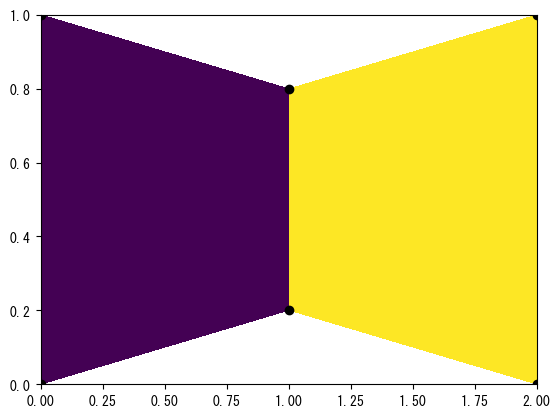

In [6]:
X = np.array([[0, 1, 2], [0, 1, 2]])
Y = np.array([[0, 0.2, 0], [1, 0.8, 1]])
C = np.array([[0.5, 0.8]])

plt.plot(X.ravel(), Y.ravel(), "ko")
plt.pcolormesh(X, Y, C)
plt.margins(0.1);

以下の例では、`pcolormesh()`を使用して複素平面上の座標変換を描画します。次のグラフでは、$s$平面上の矩形領域を示します。`test_pcolormesh_shading()`では、三種類の描画モードをデモンストレーションします。

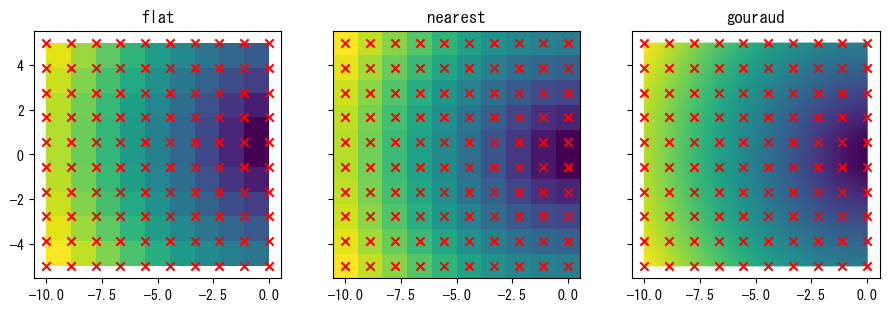

In [8]:
def test_pcolormesh_shading(X, Y, C):
    fig, axes = plt.subplots(
        1, 3, figsize=(9, 3), sharex=True, sharey=True, layout="constrained"
    )
    for ax in axes:
        ax.set_aspect("equal")
    axes[0].set_title("flat")
    axes[0].pcolormesh(X, Y, C[:-1, :-1], shading="flat")
    axes[0].scatter(X, Y, marker="x", color="red")

    axes[1].set_title("nearest")
    axes[1].pcolormesh(X, Y, C, shading="nearest")
    axes[1].scatter(X, Y, marker="x", color="red")

    axes[2].set_title("gouraud")
    axes[2].pcolormesh(X, Y, C, shading="gouraud")
    axes[2].scatter(X, Y, marker="x", color="red")
    return fig


n = 10
x, y = np.mgrid[-10 : 0 : n * 1j, -5 : 5 : n * 1j]
s = x + 1j * y
test_pcolormesh_shading(s.real, s.imag, np.abs(s));

上のグラフからわかるように、`flat`モードでは、`X`と`Y`引数は各四角形の頂点に対応し、色は`C`で決まります。`nearest`の場合、`X`と`Y`は各四角形の中心に対応し、色は`C`で決まります。`gouraud`の場合、`X`と`Y`は各四角形の頂点に対応し、色は滑らかに変化します。

次のグラフは、式$z = \frac{2 + s}{2 - s}$による座標変換後のメッシュを示しています。この場合、`X`と`Y`は長方形のグリッドではないため、`nearest`モードでは`X`と`Y`を四角形の中心になるように計算することが不可能となり、警告が表示されます。

C:\Users\ruoyu\AppData\Local\Temp\ipykernel_15484\1670641329.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axes[1].pcolormesh(X, Y, C, shading="nearest")


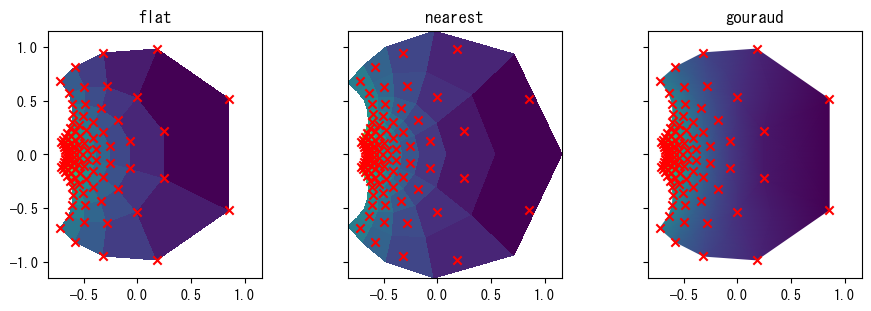

In [9]:
z = (2 + s) / (2 - s)
test_pcolormesh_shading(z.real, z.imag, np.abs(s));

極座標でも`pcolormesh()`を使用してメッシュを描画できます。以下の例では、`mgrid[]`を使用して極座標の等間隔メッシュを作成し、`projection`が`polar`のサブプロットでこのメッシュを描画します：

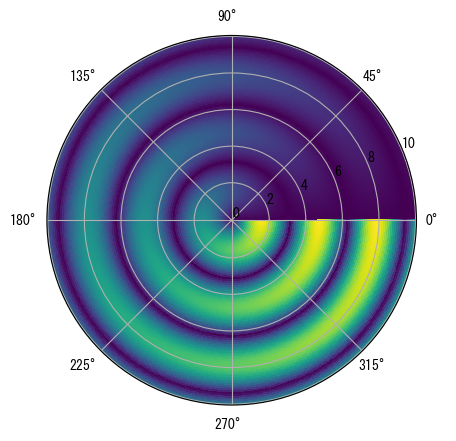

In [84]:
def func(theta, r):
    y = theta * np.sin(r)
    return np.sqrt(y * y)


T, R = np.mgrid[0 : 2 * np.pi : 360j, 0:10:100j]
Z = func(T, R)

ax = plt.subplot(111, projection="polar", aspect=1.0)
ax.pcolormesh(T, R, Z, rasterized=True);

## 三角形メッシュ

産業工学設計と分析では、解析対象を三角形メッシュで離散化し、有限要素法を使用してシミュレーションを行うことがよくあります。matplotlibでは、以下の三角形メッシュ描画関数が提供されています：

* `triplot()`：三角形メッシュの辺線を描画
* `tripcolor()`：`pcolormesh()`と同様に塗りつぶし色の三角形メッシュを描画
* `tricontour()`と`tricontourf()`：三角形メッシュの等高線を描画

`diffusion.txt`は、`FiPy`を使用して2次元定常熱伝導問題を有限要素法でシミュレーションした結果です。このファイルは3つの部分に分かれています：

* `#points`で始まる部分は、形状が`(N_points, 2)`の配列で、`N_points`個の点の座標を保存しています。
* `#triangles`で始まる部分は、形状が`(N_triangles, 3)`の配列で、各三角形の3つの頂点の`points`配列内のインデックスを保存しています。
* `#values`で始まる部分は、形状が`(N_triangles, 1)`の配列で、各三角形に対応する温度を保存しています。

以下のプログラムは、これらのデータを`data`辞書に読み込みます：

In [85]:
with open("data/diffusion.txt") as f:
    data = {"points": [], "triangles": [], "values": []}
    values = None
    for line in f:
        line = line.strip()
        if not line:
            continue
        if line.startswith("#"):
            values = data[line[1:]]
            continue
        values.append([float(s) for s in line.split()])

data = {key: np.array(data[key]) for key in data}

その後、`trip*()`を呼び出して三角形メッシュで対象領域の温度を表示できます。その結果は次のグラフに示されています。

❶`tripcolor()`のパラメータは、左から順に各点のX軸座標、Y軸座標、三角形頂点インデックス、スカラー配列です。スカラー配列内の各値は、各頂点に対応するか、各三角形に対応します。この例では、`values`の長さが`triangles`の第0軸の長さと同じであるため、各値は三角形に対応します。スカラー配列の長さが頂点数と同じ場合、各三角形に対応する値はその3つの頂点の平均値で決定されます。

❷`triplot()`を呼び出してすべての三角形の辺線を描画します。❸`tricontour()`を呼び出して等高線を描画します。これはスカラー配列が三角形頂点に対応することを要求しますが、この例ではスカラー配列が三角形に対応しているため、まず各三角形の重心座標`Xc`と`Yc`を計算し、`values`内の各値が各三角形の重心に対応するようにします。`tricontour()`を呼び出す際に三角形頂点インデックス情報を渡さない場合、matplotlibの組み込みの三角形分割アルゴリズムが呼び出され、各三角形に対応する頂点が計算されます。

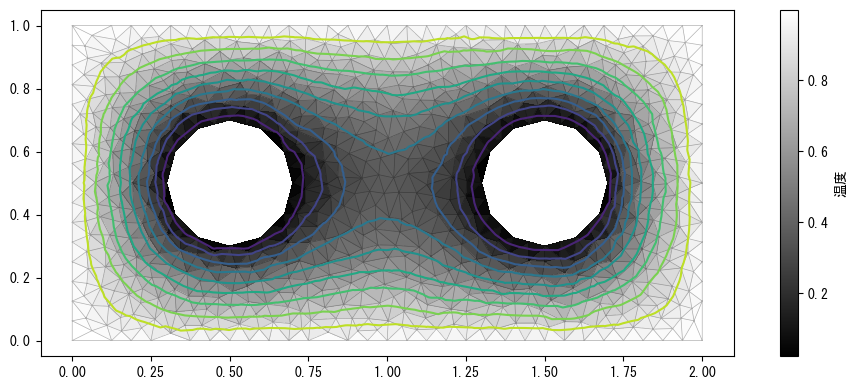

In [86]:
X, Y = data["points"].T
triangles = data["triangles"].astype(int)
values = data["values"].squeeze()

fig, ax = plt.subplots(figsize=(12, 4.5))
ax.set_aspect("equal")

mapper = ax.tripcolor(X, Y, triangles, values, cmap="gray")  #❶
plt.colorbar(mapper, label="温度")

plt.triplot(X, Y, triangles, lw=0.5, alpha=0.3, color="k")  #❷

Xc = X[triangles].mean(axis=1)
Yc = Y[triangles].mean(axis=1)
plt.tricontour(Xc, Yc, values, 10)  #❸;

## 矢印図

`quiver()`を使用して、多数の矢印でベクトル場を表現することができます。以下のプログラムは、$f(x,y) = x e^{x^2-y^2}$の勾配場を表示し、その結果は次のグラフに示されています。`vec_field(f, x, y)`は、関数`f`の`x`と`y`における偏微分を近似計算します。

`quiver()`の最初の5つの引数では、`X, Y`は矢印の始点のX軸とY軸の座標、`U, V`は矢印の方向と大きさのベクトル、`C`は矢印に対応する値です。

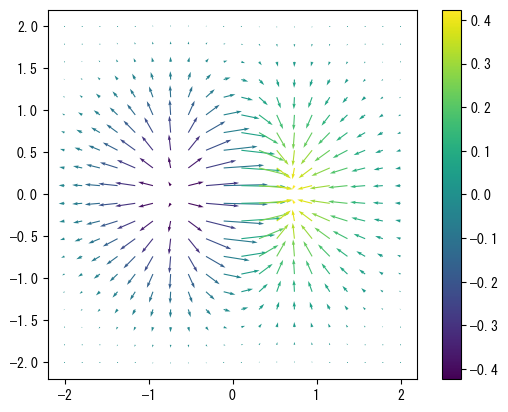

In [87]:
def f(x, y):
    return x * np.exp(-(x**2) - y**2)


def vec_field(f, x, y, dx=1e-6, dy=1e-6):
    x2 = x + dx
    y2 = y + dy
    v = f(x, y)
    vx = (f(x2, y) - v) / dx
    vy = (f(x, y2) - v) / dy
    return vx, vy


X, Y = np.mgrid[-2:2:20j, -2:2:20j]
C = f(X, Y)
U, V = vec_field(f, X, Y)
plt.quiver(X, Y, U, V, C)
plt.colorbar()
plt.gca().set_aspect("equal")

さらに、`quiver()`は矢印のサイズと方向を設定するための多くのパラメータを提供しています。

* 矢印の長さは`scale`と`scale_units`によって決定されます。`scale`は数値で、矢印のスケーリング尺度を表し、`scale_units`は矢印の長さの単位で、`'width'`、`'height'`、`'dots'`、`'inches'`、`'x'`、`'y'`、`'xy'`などの単位を選択できます。`'width'`と`'height'`はサブプロットの幅と高さ、`'dots'`と`'inches'`はポイントとインチ単位、`'x'`、`'y'`、`'xy'`はデータ座標系のX軸、Y軸、または単位行列の対角線を単位とします。矢印の長さは「UVベクトルの長さ * 矢印の長さの単位 / スケーリング尺度」で計算されます。例えば、`scale`が2で、`scale_units`が`'x'`で、UVベクトルの長さが3の場合、対応する矢印の長さは1.5個のX軸単位長さになります。

* `width`、`headwidth`、`headlength`、`headaxislength`などのパラメータは、矢印のシャフトの太さ、矢印部分のサイズと長さを決定し、`units`パラメータはこれらのパラメータの単位を決定します。これらのパラメータの意味は次のグラフに示されています。

![quiver矢印の各パラメータの意味](images/quiver_arrow.png)

* `pivot`パラメータは矢印の回転中心を決定し、`'tail', 'middle', 'tip'`などの値を取ることができます。上のグラフでは、これらの回転点を灰色の円点で示しています。

* `angles`パラメータは矢印の方向を決定します。正方形はX軸とY軸のスケーリング尺度が異なるため長方形として表示されることがあり、方向の計算方法には`'uv'`と`'xy'`の2つがあります。`'uv'`は`U`と`V`の値のみを使用して方向を計算するため、`U`と`V`の値が同じ場合、方向は45度になります。一方、`'xy'`は`U`と`V`を使用して角度を計算する際にX軸とY軸のスケーリング尺度を考慮します。

以下に、これらのパラメータの使用方法を理解するための2つの例を示します。まず、パラメータ曲線を描画し、その曲線に沿って40個の等分割された矢印を描画します。矢印の方向は、矢印の位置における曲線の接線方向を示し、色は矢印の位置におけるパラメータの大きさを示します。計算部分は読者自身で分析していただくとして、以下ではこれらのパラメータがどのように矢印のサイズと方向を決定するかを詳しく説明します。

矢印の長さとその他のサイズの単位は`scale_units`と`units`によって決定され、この例ではどちらも`'dots'`、つまりピクセル単位です。`dx`と`dy`は矢印のベクトルを表し、その長さは1で、`scale`パラメータを`1.0/arrow_size`に設定することで、すべての矢印の長さが`arrow_size`ピクセルになります。矢印のシャフトの幅は`width`パラメータで指定され、この例では1ピクセルです。`headwidth`、`headlength`、`headaxislength`などのパラメータは、矢印部分の幅、長さ、および矢印とシャフトの接触部分の長さを決定し、これらのパラメータは対応する長さとシャフト幅の比率係数です。この例では、シャフト幅が1ピクセルであるため、矢印の幅は`arrow_size * 0.5`ピクセルで、矢印部分の長さは矢印の長さと同じであるため、図中の矢印にはシャフト部分がありません。

サブプロットのX軸とY軸のスケーリング比率が異なるため、`angles`パラメータを`"xy"`に設定し、矢印の方向が曲線の接線方向と一致するようにしています。

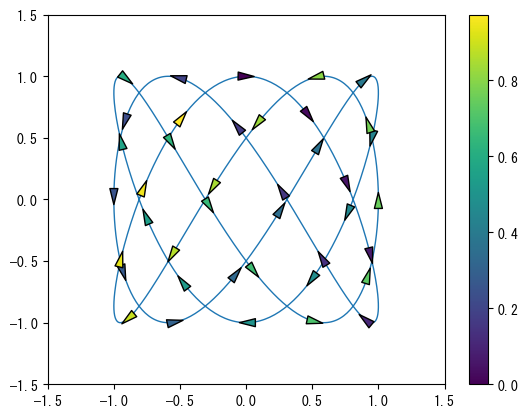

In [88]:
n = 40
arrow_size = 16
t = np.linspace(0, 1, 1000)
x = np.sin(3 * 2 * np.pi * t)
y = np.cos(5 * 2 * np.pi * t)
(line,) = plt.plot(x, y, lw=1)

lengths = np.cumsum(np.hypot(np.diff(x), np.diff(y)))
length = lengths[-1]
arrow_locations = np.linspace(0, length, n, endpoint=False)
index = np.searchsorted(lengths, arrow_locations)
dx = x[index + 1] - x[index]
dy = y[index + 1] - y[index]
ds = np.hypot(dx, dy)
dx /= ds
dy /= ds
plt.quiver(
    x[index],
    y[index],
    dx,
    dy,
    t[index],
    units="dots",
    scale_units="dots",
    angles="xy",
    scale=1.0 / arrow_size,
    pivot="middle",
    edgecolors="black",
    linewidths=1,
    width=1,
    headwidth=arrow_size * 0.5,
    headlength=arrow_size,
    headaxislength=arrow_size,
    zorder=100,
)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5]);

また、`quiver()`を使用して始点と終点の矢印の集合を描画することもできます。以下の例では、ニューラルネットワークの構造図を描画し、その結果は次のグラフに示されています。矢印が2つのニューロンノードを接続できるようにするために、`scale_units`を`"xy"`に、`angles`を`"xy"`に設定し、`scale`を1に設定します。これにより、矢印の長さはデータ空間における矢印のベクトルの長さになります。

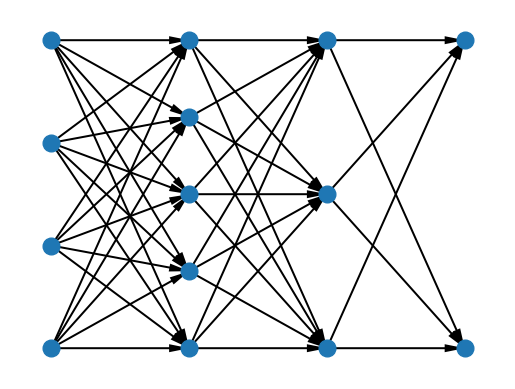

In [89]:
levels = [4, 5, 3, 2]
x = np.linspace(0, 1, len(levels))

for i in range(len(levels) - 1):
    j = i + 1
    n1, n2 = levels[i], levels[j]
    y1, y2 = np.mgrid[0 : 1 : n1 * 1j, 0 : 1 : n2 * 1j]
    x1 = np.full_like(y1, x[i])
    x2 = np.full_like(y2, x[j])
    plt.quiver(
        x1,
        y1,
        x2 - x1,
        y2 - y1,
        angles="xy",
        units="dots",
        scale_units="xy",
        scale=1,
        width=2,
        headlength=10,
        headaxislength=10,
        headwidth=4,
    )

yp = np.concatenate([np.linspace(0, 1, n) for n in levels])
xp = np.repeat(x, levels)
plt.plot(xp, yp, "o", ms=12)
plt.gca().axis("off")
plt.margins(0.1, 0.1);

## 3次元グラフ

`mpl_toolkits.mplot3d`モジュールは、matplotlibに基づいて3次元プロット機能を提供します。これはmatplotlibの2次元プロット機能を使用して3次元グラフを描画するため、大規模なデータの3次元プロットには適していません。より複雑な3次元データの可視化機能が必要な場合は、PyVistaの章を参照してください。

以下は、3次元曲面を描画するプログラムです。プログラムの出力は次のグラフに示されています。

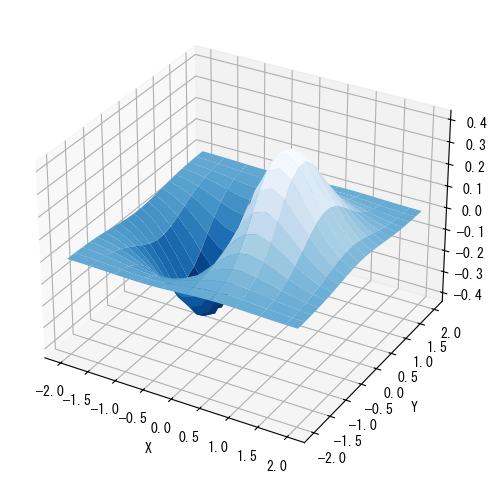

In [90]:
import mpl_toolkits.mplot3d  #❶

x, y = np.mgrid[-2:2:20j, -2:2:20j]  #❷
z = x * np.exp(-(x**2) - y**2)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection="3d")  #❸
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap=plt.cm.Blues_r)  #❹
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

❶まず、`mplot3d`モジュールをインポートします。matplotlibの3次元プロット関連の機能はすべてこのモジュールに定義されています。❷`mgrid`を使用してX-Y平面のグリッドを作成し、グリッド上の各点の高さ`z`を計算します。3次元曲面を描画する関数は、X、Y、Z軸のデータを同じ形状の2次元配列で要求するため、ここでは`ogrid`を使用して作成することはできません。以前の`imshow()`とは異なり、配列の第0軸はX軸とY軸のどちらかを表すことができ、この例では第0軸がX軸、第1軸がY軸を表します。

❸現在の図にサブプロットを作成し、`projection`パラメータでサブプロットの投影モードを`"3d"`に指定します。これにより、`subplot()`は3次元プロット用の`Axes3D`サブプロットオブジェクトを返します。

:::{admonition} 影モード
:class: note
投影モードは、データ座標からスクリーン座標への変換方法を決定します。以下のコマンドで現在有効な投影モードの名前を取得できます：

```ipython
>>> from matplotlib import projections
>>> projections.get_projection_names()
['3d', 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']
```
`mplot3d`モジュールをインポートした後、このリストに`'3d'`投影モードが表示されます。`'aitoff'`、`'hammer'`、`'lambert'`、`'mollweide'`などは地図投影、`'polar'`は極座標投影、`'rectilinear'`はデフォルトの直線投影モードです。
:::

❹`Axes3D`オブジェクトの`plot_surface()`を呼び出して3次元曲面図を描画します。パラメータ`x`、`y`、`z`はすべて形状が`(20, 20)`の2次元配列です。配列`x`と`y`はX-Y平面上のグリッドを構成し、配列`z`はグリッド上の各点の曲面の値を表します。`cmap`パラメータで値と色のマッピング、つまり曲面上の各点の高さ値とその色の対応関係を指定します。`rstride`と`cstride`パラメータは、配列の第0軸と第1軸のインデックス間隔です。大きな配列の場合、大きな間隔を使用することで曲面の描画速度を向上させることができます。

3次元曲面の描画以外にも、`Axes3D`オブジェクトは多くの他の3次元プロットメソッドを提供しています。公式サイトでさまざまな3次元プロットのデモプログラムを参照してください。